In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [24]:
df = pd.read_excel('/content/AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [25]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [26]:
df.drop(['Date','Time'],axis=1,inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(axis=1, thresh=len(df) * 0.7, inplace=True)

In [27]:
print(df.columns)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')


In [28]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [30]:
threshold = df['CO(GT)'].mean()
df['AirQuality'] = np.where(df['CO(GT)'] > threshold, 'Good', 'Bad')

In [31]:
x = df.drop(columns=['CO(GT)','AirQuality'])
y = df['AirQuality']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [35]:
y_pred = model.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f} %')
print('Classification')
print(classification_report(y_test, y_pred))

Accuracy: 91.67 %
Classification
              precision    recall  f1-score   support

         Bad       0.78      0.73      0.76       328
        Good       0.94      0.96      0.95      1544

    accuracy                           0.92      1872
   macro avg       0.86      0.85      0.85      1872
weighted avg       0.92      0.92      0.92      1872



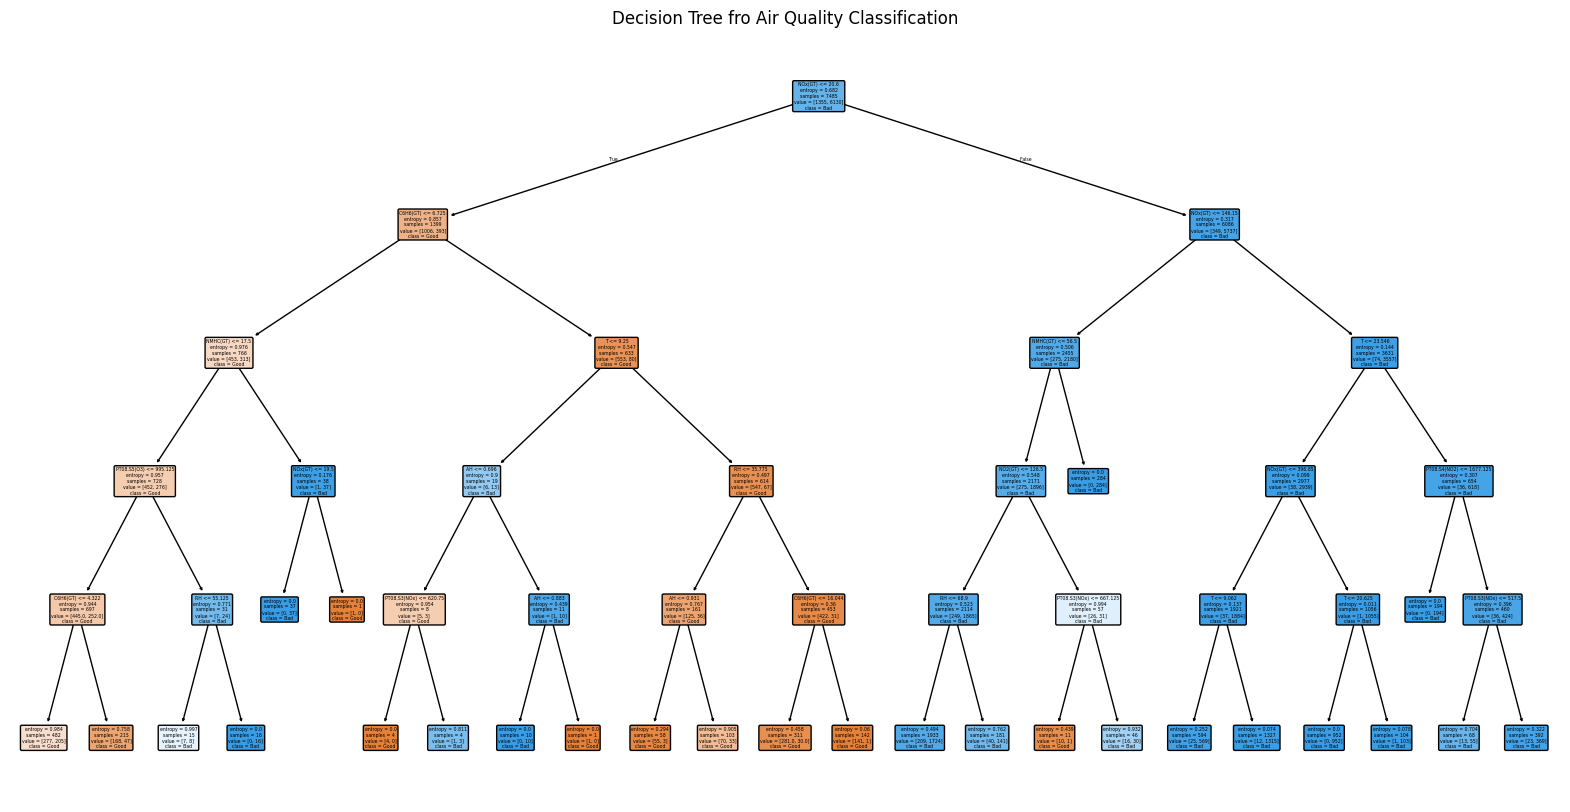

In [37]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Good', 'Bad'], rounded=True)
plt.title("Decision Tree fro Air Quality Classification")
plt.show()